In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uniform_files=os.listdir("/content/drive/MyDrive/data/uniform")
non_uniform_files=os.listdir("/content/drive/MyDrive/data/non_uniform")

In [ ]:
print(uniform_files[90])

6704fef035f9b71855079ee1.jpg


In [ ]:
print(non_uniform_files[0])

22101a010220.jpg


In [ ]:
print(len(uniform_files))
print(len(non_uniform_files))

388
353


In [ ]:
uniform_labels=[1]*len(uniform_files)
non_uniform_labels=[0]*len(non_uniform_files)
labels=uniform_labels+non_uniform_labels

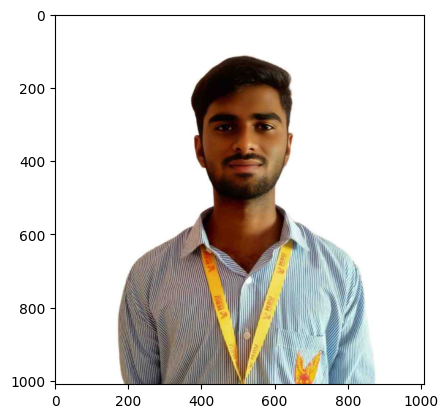

In [ ]:
a=mpimg.imread('/content/drive/MyDrive/data/uniform/22101A010567.jpg')
plt.imshow(a)
plt.show()

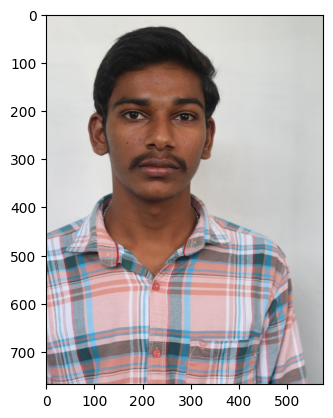

In [ ]:
a=mpimg.imread("/content/drive/MyDrive/data/non_uniform/22101a010566.jpg")
plt.imshow(a)
plt.show()

In [ ]:
data=[]
for i in uniform_files:
    img=Image.open("/content/drive/MyDrive/data/uniform/"+i)
    image=img.resize((512,512), Image.Resampling.LANCZOS)
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [ ]:
for i in non_uniform_files:
    img=Image.open("/content/drive/MyDrive/data/non_uniform/"+i)
    image=img.resize((512,512), Image.Resampling.LANCZOS)
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [ ]:
len(data)

741

In [ ]:
data=np.array(data)
label=np.array(labels)

In [ ]:
data.shape

(741, 512, 512, 3)

In [ ]:
label.shape

(741,)

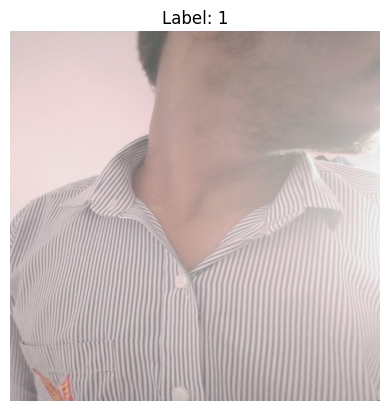

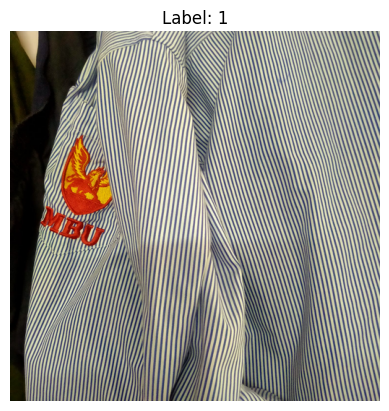

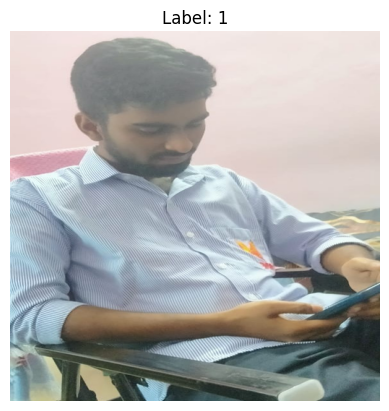

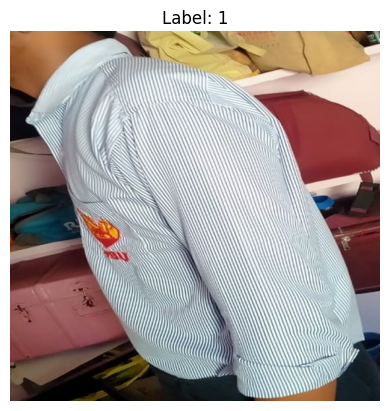

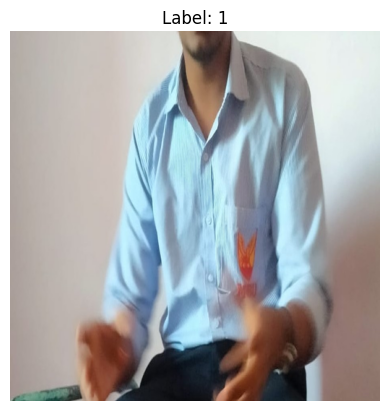

In [ ]:
for i in range(5):
    plt.imshow(data[200+i])
    plt.title(f"Label: {label[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.10,random_state=0,stratify=label)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train[0]

array([[[0.98431373, 0.98039216, 0.96470588],
        [0.98823529, 0.98431373, 0.96862745],
        [0.98823529, 0.98431373, 0.96862745],
        ...,
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588]],

       [[0.98823529, 0.98431373, 0.96862745],
        [0.98823529, 0.98431373, 0.96862745],
        [0.98823529, 0.98431373, 0.96862745],
        ...,
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588]],

       [[0.98823529, 0.98431373, 0.96862745],
        [0.98823529, 0.98431373, 0.96862745],
        [0.98823529, 0.98431373, 0.96862745],
        ...,
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588],
        [0.98431373, 0.98039216, 0.96470588]],

       ...,

       [[0.83921569, 0.84705882, 0.83529412],
        [0.83921569, 0.84705882, 0.83529412],
        [0.83921569, 0

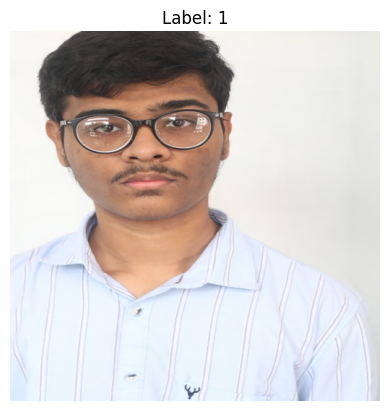

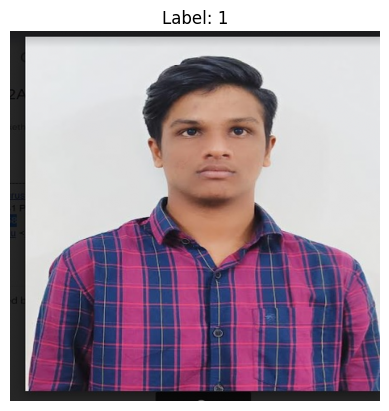

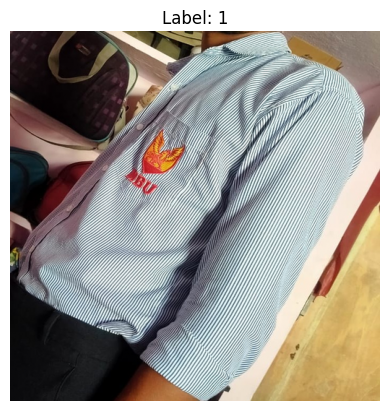

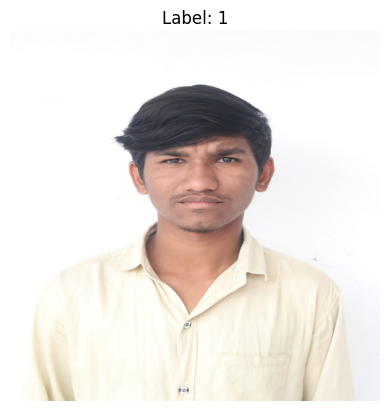

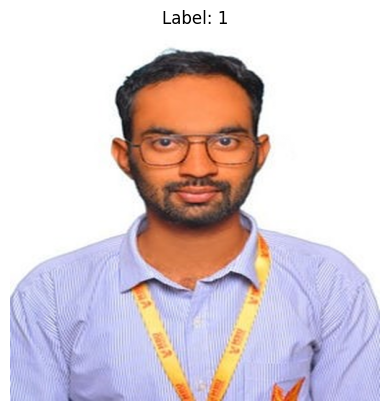

In [ ]:
for i in range(5):
    plt.imshow(x_train[120+i])
    plt.title(f"Label: {label[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
for i in range(5):
    print(y_train[120+i])

0
0
1
0
1


In [ ]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation between 0-20 degrees
    width_shift_range=0.2,   # Horizontal shift by 20% of the width
    height_shift_range=0.2,  # Vertical shift by 20% of the height
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Filling strategy for new pixels
)

In [ ]:
# Fit the generator to the training data (only if x_train is a NumPy array)
datagen.fit(x_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout , Flatten ,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512,512, 3))

<ipython-input-25-7167432ee0bb>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512,512, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 16, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,593 (9.24 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=15,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 280s 13s/step - accuracy: 0.8306 - loss: 0.3629 - val_accuracy: 0.9867 - val_loss: 0.1630
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 232s 11s/step - accuracy: 0.9885 - loss: 0.0432 - val_accuracy: 0.9867 - val_loss: 0.0875
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 230s 11s/step - accuracy: 0.9850 - loss: 0.0537 - val_accuracy: 0.9733 - val_loss: 0.0673
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 241s 11s/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9867 - val_loss: 0.0522
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 230s 11s/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.9733 - val_loss: 0.0485
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 228s 11s/step - accuracy: 0.9958 - loss: 0.0241 - val_accuracy: 0.9867 - val_loss: 0.0394
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 226s 11s/step - accuracy: 0.9967 - loss: 0.0158 - val_accuracy: 0.9867 - val_loss: 0.0417
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 227s 11s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.

In [ ]:
loss

0.027931073680520058

In [ ]:
accuracy

0.9733333587646484

In [ ]:
y_pred=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)

<Axes: >

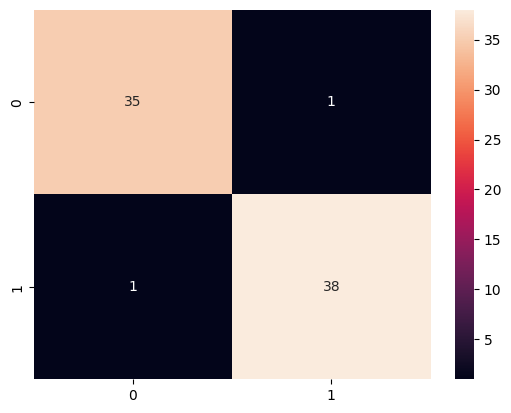

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

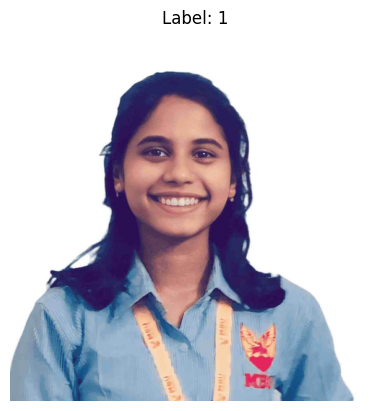

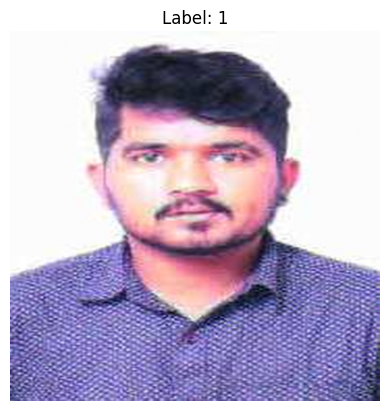

In [ ]:
k=0
for i,j in zip(y_test,y_pred):
    if i!=j:
      plt.imshow(x_test[k])
      plt.title(f"Label: {label[k]}")
      plt.axis('off')
      plt.show()
    k+=1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
[[0.00164881]]
not wearing uniform


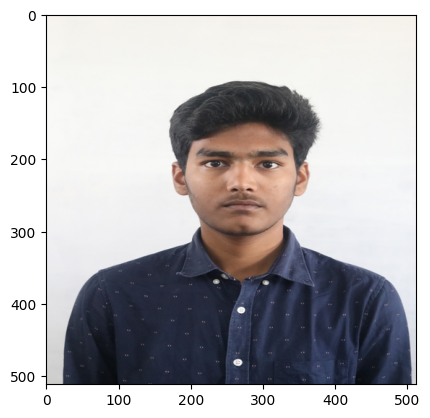

In [ ]:
img_path="/content/drive/MyDrive/data/non_uniform/22101a010290.jpg"
image=Image.open(img_path)
#plt.imshow(image)
image=image.resize((512,512), Image.Resampling.LANCZOS)
image=image.convert('RGB')
image=np.array(image)
image=image/255.0
plt.imshow(image)
image=np.reshape(image,[1,512,512,3])
img_pred=model.predict(image)
print(img_pred)
print("wearing uniform" if img_pred[0][0]>0.5 else "not wearing uniform")

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create 1 row, 2 columns, this is the first subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create 1 row, 2 columns, this is the first subplot
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
# Save the entire model
model.save("MobileNetV2_15.h5")